## House Price Prediction Model

Regression problem (Predicting a quantity/continues values) -- XGBoost

Regression in machine learning is a type of supervised learning algorithm used to predict continuous numeric values. It is a method of modeling the relationship between one or more independent variables (also known as features) and a dependent variable (also known as the target). The goal of regression is to find the best-fit line or curve that can predict the value of the dependent variable for any new input data.

Here are some common scenarios where regression is applied:

1. Prediction: Regression is often used in predictive modeling to forecast future outcomes based on historical data. For example, a regression model can be used to predict the stock price of a company based on its historical price, market trends, and other factors.

2. Forecasting: Regression can be used to forecast future trends, such as predicting the number of sales for a particular product over the next quarter or predicting the weather conditions for the next week.

3. Trend Analysis: Regression can be used to analyze trends in data, such as identifying changes in consumer behavior or identifying patterns in stock prices.

4. Relationship Analysis: Regression can be used to analyze the relationship between variables, such as the correlation between a person's age and their income.

5. Optimization: Regression can be used to optimize a system or process by identifying the key variables that affect the outcome and determining the optimal values for those variables.

Overall, regression is used when there is a need to predict continuous numeric values, model the relationship between variables, and make decisions based on that relationship. The application of regression depends on the specific problem and the availability of relevant data.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets

### DATA PRE-PROCESSING

Boston House Price Dataset

In [14]:
dataset = sklearn.datasets.load_boston()

/Users/thomasverdier/opt/anaconda3/envs/data_science/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets in

In [18]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df["price"] = dataset.target

In [20]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [25]:
## Checking for missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [23]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

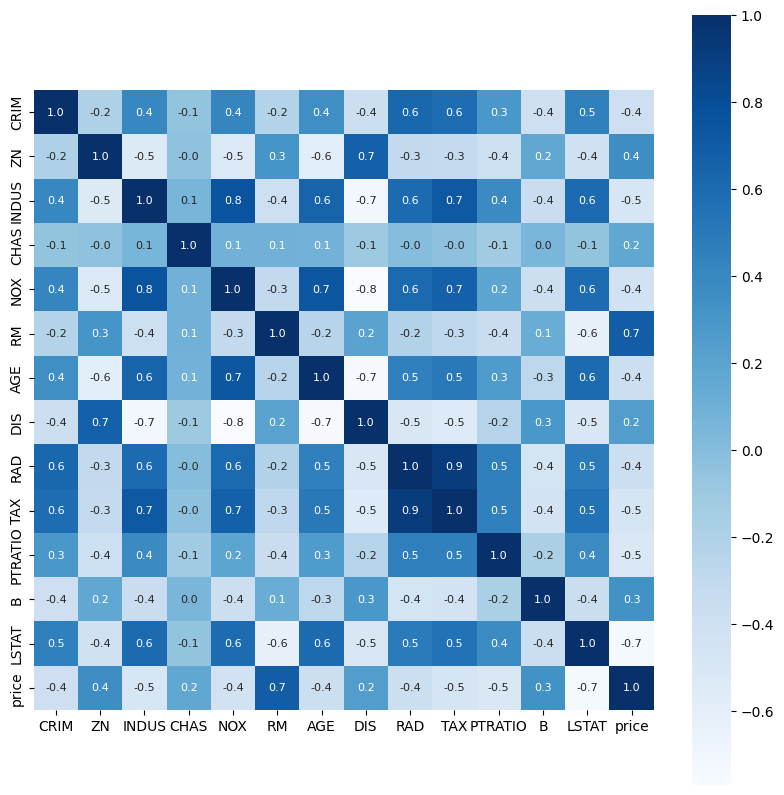

In [28]:
## Analyzing correlation between various features
correlation = df.corr()
## Constructing heat map
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Takeaways:

- if LSTAT increases, price goes down
- ...

Reminder:

1. Positevely correlated: As one increases the other increases as well // As one decreases the other decreases as well
2. Negatively correlated: As one increases the other decreases // As one decreases the other increases
3. 0 -->  Not correlated

### Separating Data and Target

In [29]:
X = df.drop("price", axis=1)
y = df["price"]

In [30]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [32]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

### Splitting data into Training and Test data

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


### CREATING MODEL -- Training

XGBoost Regressor

XGBoost (Extreme Gradient Boosting) Regressor is a popular machine learning algorithm used for regression tasks. It is an extension of the Gradient Boosting algorithm that combines multiple decision trees and uses boosting to improve the accuracy of the model. XGBoost is known for its efficiency and scalability, making it a popular choice for large-scale machine learning problems.

The XGBoost Regressor works by building a series of decision trees, where each tree is trained to predict the residual error of the previous tree. The process continues until the model reaches a certain level of accuracy or a predefined number of trees is reached. The final prediction is the sum of the predictions of all the trees.

Some of the key features of the XGBoost Regressor include:

1. Regularization: XGBoost includes L1 and L2 regularization to prevent overfitting and improve generalization.

2. Parallel Processing: XGBoost can run in parallel on multiple CPU cores, making it faster and more efficient.

3. Handling missing values: XGBoost can handle missing values in the input data, reducing the need for data preprocessing.

4. Cross-validation: XGBoost includes built-in cross-validation to help with model selection and hyperparameter tuning.

5. Feature Importance: XGBoost can calculate feature importance scores, which can help identify the most important features for the model.

In summary, XGBoost Regressor is a powerful and efficient machine learning algorithm used for regression tasks. Its ability to handle missing values, regularization, and feature importance analysis makes it a popular choice for complex machine learning problems.


In [37]:
from xgboost import XGBRegressor

In [38]:
model = XGBRegressor()

In [39]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

### Evaluating model

In [42]:
from sklearn import metrics

In [54]:
## predictions on training data
preds_training = model.predict(X_train)

In [55]:
## R squarred error (residuals) ## Needs to be under 1 // over 10 then model is not performing well
r2_score_train = metrics.r2_score(y_train, preds_training)

In [56]:
r2_score_train

0.9999948236320982

In [57]:
## Mean absolute error
mae_score_train = metrics.mean_absolute_error(y_train, preds_training)

In [60]:
mae_score_train

0.0145848437110976

In [59]:
## predictions on testing data
preds_testing = model.predict(X_test)

In [61]:
r2_score_test = metrics.r2_score(y_test, preds_testing)

In [62]:
r2_score_test

0.8711660369151691

In [63]:
mae_score_test = metrics.mean_absolute_error(y_test, preds_testing)

In [64]:
mae_score_test

2.2834744154238233

### Vizualizing actual prices and predicted prices

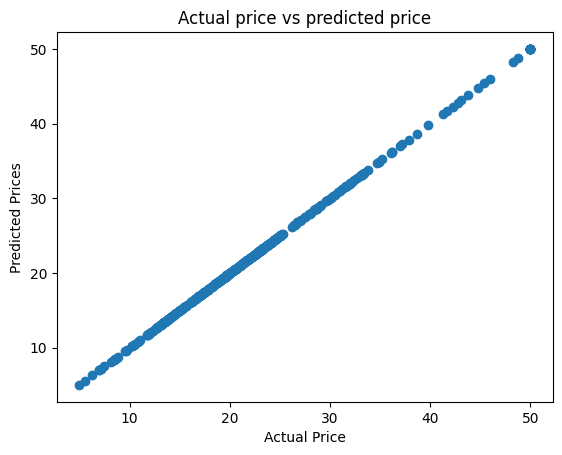

In [65]:
plt.scatter(y_train, preds_training)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual price vs predicted price")
plt.show()

## Applying model to a new dataset (California housing) -- Boston one is deprecated

### Retrieving data

In [68]:
dataset2 = sklearn.datasets.fetch_california_housing()

In [70]:
df2 = pd.DataFrame(dataset2.data, columns=dataset2.feature_names)

In [73]:
df2["price"] = dataset2.target

In [75]:
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Analyzing data

In [76]:
## checking for missing values
df2.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [77]:
## General statistics
df2.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [81]:
## Correlation analysis
df_corr = df2.corr()
df_corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<AxesSubplot:>

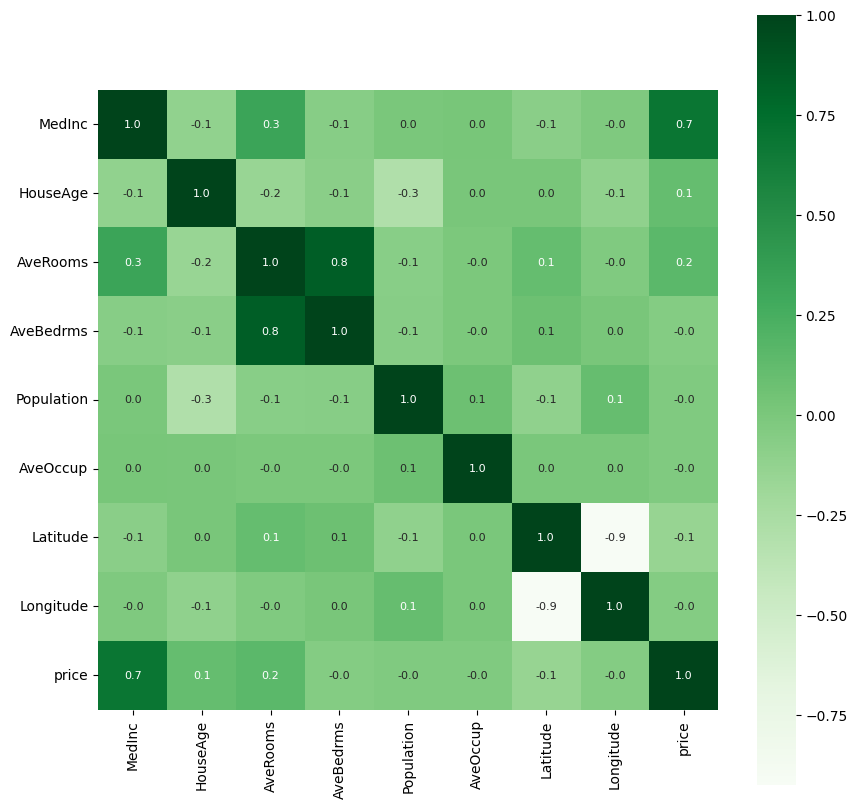

In [85]:
## Plotting heat map
plt.figure(figsize=(10,10))
sns.heatmap(df_corr, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')

### TRAINING/TESTING DATA SPLIT

In [89]:
X = df2.drop("price", axis=1)
y = df2["price"]

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [91]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


### Model Creation

XGBoost Regrssor

In [86]:
from xgboost import XGBRegressor

In [92]:
model = XGBRegressor()
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)

In [93]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

### Model eval


- The R-squared (R²) error is a statistical measure that represents the proportion of variance in the dependent variable that can be explained by the independent variable(s) in a linear regression model. It is a measure of how well the regression line fits the observed data points.

    The R-squared error value ranges between 0 and 1, with a value of 1 indicating that the regression line perfectly fits the data points, and a value of 0 indicating that the regression line does not explain any of the variation in the dependent variable.

    To calculate the R-squared error, the sum of the squared differences between the predicted and actual values is divided by the total sum of squares, which is the sum of the squared differences between the actual values and the mean of the dependent variable.

    R² = 1 - (sum of squared residuals / total sum of squares)

    A high R-squared value indicates a good fit of the model to the data, while a low value indicates that the model does not fit the data well. However, it is important to note that a high R-squared value does not necessarily mean that the model is a good predictor, as it is possible to have a model that overfits the data and has a high R-squared value but performs poorly on new, unseen data.


- The mean absolute error (MAE) is a commonly used metric to measure the average difference between the actual and predicted values of a continuous variable. It is a measure of the average magnitude of the errors between the predicted and actual values.

    The MAE is calculated as the average of the absolute differences between the predicted and actual values:

    MAE = (1/n) * sum(|y_pred - y_actual|)

    where y_pred is the predicted value, y_actual is the actual value, and n is the number of data points.

    The MAE represents the average magnitude of the errors without considering their direction, which means that negative and positive errors will be treated equally. A lower MAE indicates better performance of the model, as it means that the model has a smaller average error.

    The MAE is often used as a loss function in regression problems and can be minimized during the training process of a machine learning model to improve its performance. However, it is important to note that the MAE does not provide information about the distribution of errors or the possible presence of outliers, which can be better evaluated using other metrics such as mean squared error or median absolute error.

In [94]:
### ON TRAINING DATA
preds_training = model.predict(X_train)

In [95]:
### R squarred error
r2_train = metrics.r2_score(y_train, preds_training)
### Mean Absolute error
mae_train = metrics.mean_absolute_error(y_train, preds_training)

In [99]:
print("R squarred error on TRAINING data: ", r2_train)
print("Mean absolute error on TRAINING data: ", mae_train)

R squarred error on TRAINING data:  0.9451221492760822
Mean absolute error on TRAINING data:  0.1919170860794262


In [97]:
### ON TESTING DATA
preds_testing = model.predict(X_test)

In [98]:
### R squarred error
r2_test = metrics.r2_score(y_test, preds_testing)
### Mean Absolute error
mae_test = metrics.mean_absolute_error(y_test, preds_testing)

In [100]:
print("R squarred error on TESTING data: ", r2_test)
print("Mean absolute error on TESTING data: ", mae_test)

R squarred error on TESTING data:  0.8412904408180302
Mean absolute error on TESTING data:  0.30753655785801337


### VIZUALIZING PREDICTIONS

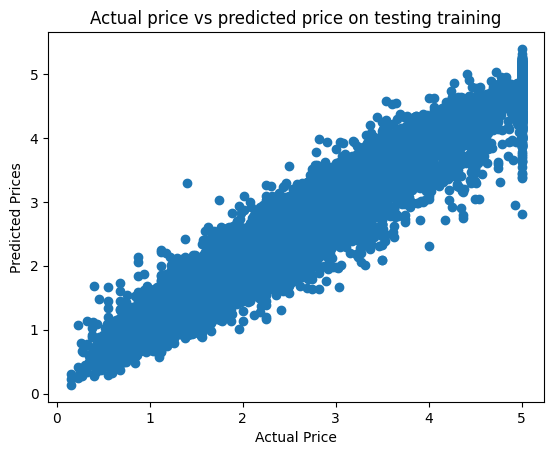

In [102]:
plt.scatter(y_train, preds_training)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual price vs predicted price on testing training")
plt.show()

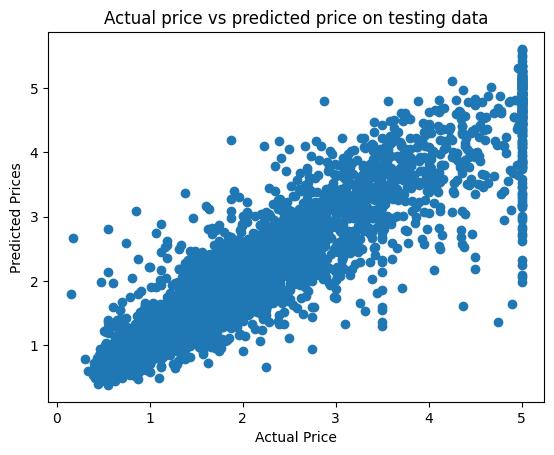

In [101]:
plt.scatter(y_test, preds_testing)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual price vs predicted price on testing data")
plt.show()

### ANALYZING FEATURE IMPORANCE

 Objective: Understand which features are most important in the model. The feature importance score represents the relative importance of each feature in predicting the target variable, and a higher score indicates that the feature is more important. You can use this information to select important features for your model or to identify potential areas of improvement.

In [120]:
feat_importances = pd.Series(model.feature_importances_, index=model.feature_names_in_).sort_values()

In [121]:
feat_importances

AveBedrms     0.026156
Population    0.026353
AveRooms      0.039529
HouseAge      0.080119
Latitude      0.106390
Longitude     0.116197
AveOccup      0.151623
MedInc        0.453633
dtype: float32

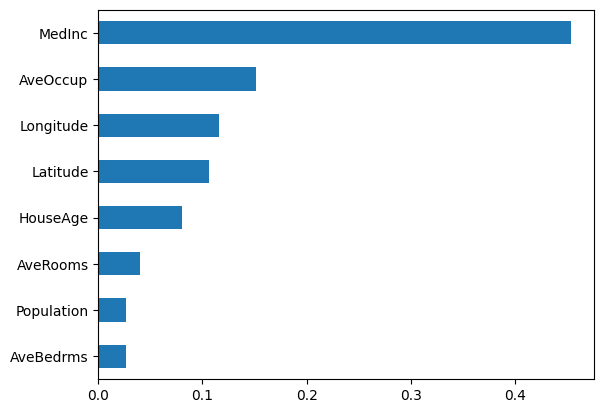

In [122]:
feat_importances.plot(kind='barh')
plt.show()

We can see that the median income in block group (MedInc) is by far the most important factor in predicting the average price of a house while the average number of bedrooms is the least important